In [1]:
import nltk
nltk.download('twitter_samples')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\pradeep\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\twitter_samples.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pradeep\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pradeep\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pradeep\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
from nltk.corpus import twitter_samples
import random

# Load twitter samples dataset
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

# Combine the datasets and create labels
tweets = positive_tweets + negative_tweets
labels = ['Positive'] * len(positive_tweets) + ['Negative'] * len(negative_tweets)

# Shuffle the dataset
combined = list(zip(tweets, labels))
random.shuffle(combined)
tweets, labels = zip(*combined)


In [3]:
from nltk.tokenize import word_tokenize

sample_text = "NLTK is a powerful library for NLP."
tokens = word_tokenize(sample_text)
print(tokens)


['NLTK', 'is', 'a', 'powerful', 'library', 'for', 'NLP', '.']


In [4]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

filtered_tokens = remove_stopwords(tokens)
print(filtered_tokens)


['NLTK', 'powerful', 'library', 'NLP', '.']


In [5]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
print(stemmed_tokens)
print(lemmatized_tokens)


['nltk', 'power', 'librari', 'nlp', '.']
['NLTK', 'powerful', 'library', 'NLP', '.']


In [6]:
from nltk.probability import FreqDist

all_words = [word.lower() for tweet in tweets for word in word_tokenize(tweet)]
all_words_freq = FreqDist(all_words)

# Select the top 2000 words as features
word_features = list(all_words_freq.keys())[:2000]

def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

# Create feature sets for training and testing
feature_sets = [(document_features(word_tokenize(tweet)), label) for (tweet, label) in zip(tweets, labels)]
train_set, test_set = feature_sets[1000:], feature_sets[:1000]


In [7]:
from nltk.classify import NaiveBayesClassifier

classifier = NaiveBayesClassifier.train(train_set)


In [8]:
import nltk.classify.util

accuracy = nltk.classify.util.accuracy(classifier, test_set)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 99.70%


In [9]:
classifier.show_most_informative_features(10)


Most Informative Features
             contains()) = True           Positi : Negati =     64.9 : 1.0
             contains(() = True           Negati : Positi =     61.9 : 1.0
           contains(sad) = True           Negati : Positi =     28.6 : 1.0
          contains(miss) = True           Negati : Positi =     19.3 : 1.0
       contains(arrived) = True           Positi : Negati =     17.1 : 1.0
     contains(community) = True           Positi : Negati =     16.4 : 1.0
          contains(blog) = True           Positi : Negati =     15.7 : 1.0
          contains(glad) = True           Positi : Negati =     14.4 : 1.0
           contains(via) = True           Positi : Negati =     12.1 : 1.0
        contains(thanks) = True           Positi : Negati =     11.9 : 1.0


In [11]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Test the analyzer
text = "NLTK is a great library for text processing!"
sentiment_scores = sid.polarity_scores(text)

print(sentiment_scores)  # Output sentiment scores



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pradeep\AppData\Roaming\nltk_data...


{'neg': 0.0, 'neu': 0.577, 'pos': 0.423, 'compound': 0.6588}


In [12]:
# Classifying a new sentence using the trained classifier
test_sentence = "This is an amazing movie!"
test_features = document_features(word_tokenize(test_sentence))
classification = classifier.classify(test_features)
print(classification)


Positive


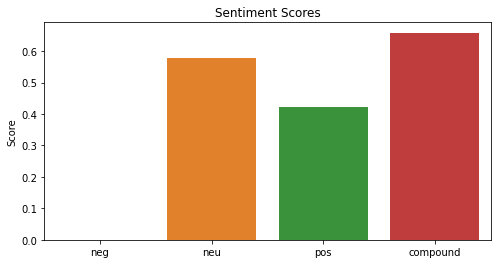

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_sentiment_scores(sentiment_scores):
    plt.figure(figsize=(8, 4))
    sns.barplot(x=list(sentiment_scores.keys()), y=list(sentiment_scores.values()))
    plt.title('Sentiment Scores')
    plt.ylabel('Score')
    plt.show()

plot_sentiment_scores(sentiment_scores)


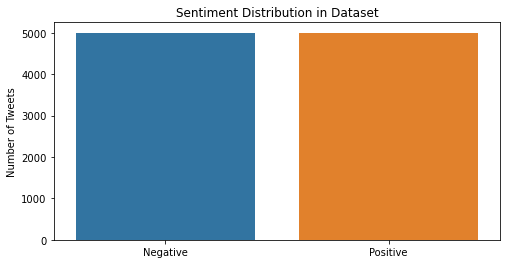

In [16]:
# Visualizing the Sentiment Distribution in the Dataset
def plot_sentiment_distribution(labels):
    sentiment_dist = FreqDist(labels)
    plt.figure(figsize=(8, 4))
    sns.barplot(x=list(sentiment_dist.keys()), y=list(sentiment_dist.values()))
    plt.title('Sentiment Distribution in Dataset')
    plt.ylabel('Number of Tweets')
    plt.show()

plot_sentiment_distribution(labels)
